In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

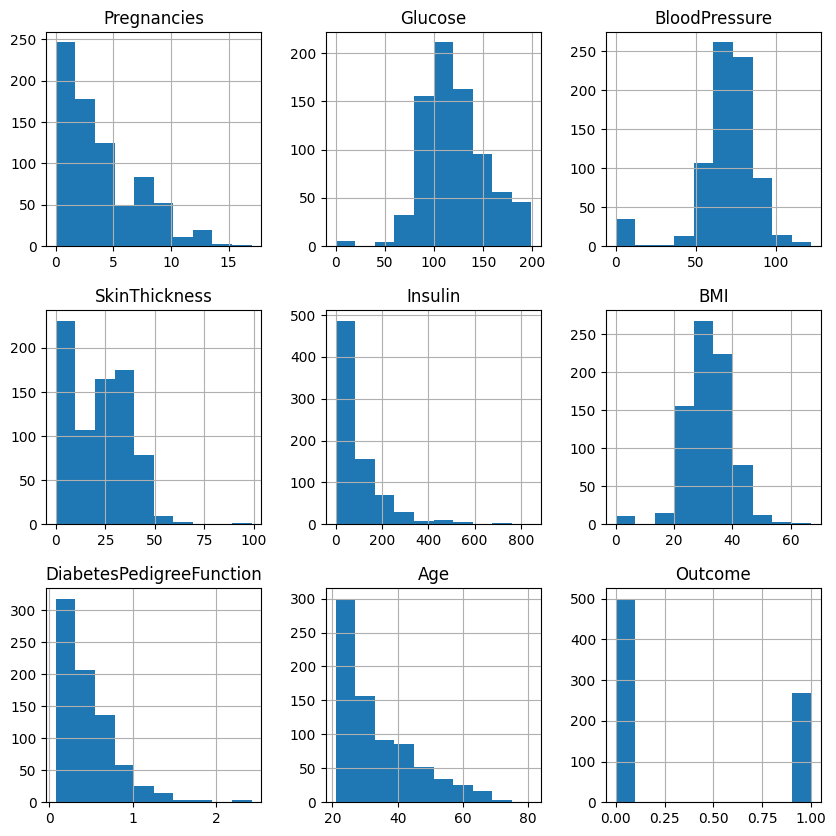

In [5]:
df.hist(figsize=(10,10))

In [6]:
y=df['Outcome']
x=df.drop(columns='Outcome')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7056277056277056

In [8]:


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)


0.7316017316017316

In [9]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_score(y_test, y_pred_svm)

0.7359307359307359

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.6883116883116883

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
paran_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=paran_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)
best_params=grid_search.best_params_
best_params

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [13]:


best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train, y_train)
y_pred_best_rf = best_rf.predict(x_test)
accuracy_score(y_test, y_pred_best_rf)


0.7532467532467533

In [14]:

from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix (Best Random Forest):\n", conf_matrix_best_rf)

class_report_best_rf = classification_report(y_test, y_pred_best_rf)
print("\nClassification Report (Best Random Forest):\n", class_report_best_rf)


Confusion Matrix (Best Random Forest):
 [[122  29]
 [ 28  52]]

Classification Report (Best Random Forest):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



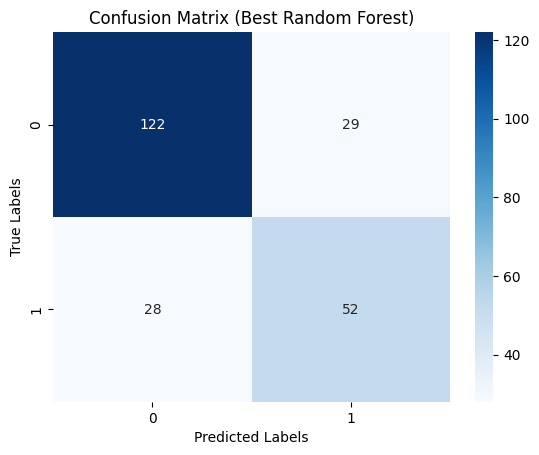

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Best Random Forest)')
plt.show()
